In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("../data/dados_desafio.xlsx")

In [3]:
df.head()

,id_pedido,tipo_pagamento,prestacoes,valor_pagamento,id_cliente,status_pedido,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,tempo_entregue_estimado,id_avaliacao,score_avaliacao,data_avaliacao,data_resposta_avaliacao,id_item,id_vendedor,data_limite_entrega,preco,valor_frete,categoria_produto,peso_produto,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cidade_vendedor,estado_vendedor,id_unica_cliente,cep_cliente,cidade_cliente,estado_cliente
0,05d5a67b06f86425711075939a164657,credit_card,1,18.38,716c95338343be76a421f05145f6d9b7,delivered,2017-10-24 09:17:09.000,2017-10-24 09:28:15.000,2017-10-25 22:45:59.000,2017-10-26 14:13:59.000,2017-11-06,5064d6d99510e06a10487f7773f79060,4,2017-10-27,2017-10-27 17:13:20.000,2a592642399b33baf3a5729a6335b21c,b83cedfb587e7911540e3f576d6917ce,2017-10-30 09:28:15.000,9.99,7.78,perfumaria,100.00,16.00,7.00,12.00,4870,sao paulo,SP,b4acaca510f847f9927914b51f9b0874,9861,sao bernardo do campo,SP
1,b1f9820e61b6a6a7643c961eaf4f217d,credit_card,1,28.23,6e550daa4d9d07414a598ee4682289a0,delivered,2018-04-09 18:06:35.971,2018-04-09 18:31:35.962,2018-04-10 19:24:56.995,2018-04-16 18:05:41.971,2018-05-07,f86e7499e15b26ac97f22354ef917bd1,5,2018-04-17,2018-04-18 12:46:56.986,499a1638595575721fec87dbaa05f339,25cf099de44674fde97473224f9d59ab,2018-04-13 18:31:31.987,10.00,18.23,automotivo,350.00,20.00,15.00,15.00,6716,cotia,SP,9abf4d8d20ca191ce59eb6227cf53d6d,38270,campina verde,MG
2,b27f6a3ed9bfe29879c912b10bcf081b,credit_card,9,92.57,dd774d127953e12f6953a9d36e6a3cc4,delivered,2018-01-02 20:32:35.981,2018-01-02 20:50:16.022,2018-01-08 12:32:48.019,2018-01-16 20:52:39.014,2018-01-24,a5fc2433140223de219d3fcfc548f3ff,4,2018-01-17,2018-01-22 10:00:16.963,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2018-01-08 20:50:16.022,79.00,13.57,papelaria,"7,000.00",60.00,20.00,30.00,13232,campo limpo paulista,SP,dc446a1ea0c8cc3eb1cd31896f6cf00f,12919,braganca paulista,SP
3,a182c021b0561e70031de925b3991fb3,credit_card,4,176.99,1d93c38087f43927ad29cdbd73a1a01b,delivered,2018-04-02 20:25:56.035,2018-04-02 20:35:17.030,2018-04-04 18:13:12.029,2018-04-11 11:14:30.970,2018-04-25,bdd2176b8d0ed0d5414dc07547720dd2,5,2018-04-12,2018-04-16 12:09:10.022,6f3b5b605d91b7439c5e3f5a8dffeea7,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-06 20:35:17.030,158.00,18.99,relogios_presentes,335.00,17.00,11.00,16.00,14840,guariba,SP,14691264ea396cd3bd71ebbe36bc6771,29278,arace,ES
4,8e76f4ac6aee1d6013e40279de68a7cf,credit_card,10,110.56,e085989aa21e36b90469d6940aefe23c,delivered,2017-08-05 17:52:44.026,2017-08-05 18:10:09.034,2017-08-07 17:39:02.966,2017-08-15 19:59:47.962,2017-08-31,44b50a1399e3b7c7b553984d2151fbc4,4,2017-08-16,2017-08-17 00:34:48.979,8cbd33515c33f6bc2042660baff504b5,cca3071e3e9bb7d12640c9fbe2301306,2017-08-10 18:10:09.034,40.18,15.10,moveis_decoracao,650.00,50.00,7.00,33.00,14940,ibitinga,SP,06c211500493e0aa2c584346c15a1d81,95770,feliz,RS


In [4]:
df.tail()

,id_pedido,tipo_pagamento,prestacoes,valor_pagamento,id_cliente,status_pedido,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,tempo_entregue_estimado,id_avaliacao,score_avaliacao,data_avaliacao,data_resposta_avaliacao,id_item,id_vendedor,data_limite_entrega,preco,valor_frete,categoria_produto,peso_produto,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cidade_vendedor,estado_vendedor,id_unica_cliente,cep_cliente,cidade_cliente,estado_cliente
112487,b0e9288a209f5ec50391c140dba4c91f,credit_card,1,36.13,e1ccb7645c1d9af9b91b6d521e0ba64a,delivered,2018-08-25 07:32:24.979,2018-08-25 07:45:07.978,2018-08-27 20:03:00.029,2018-08-30 21:16:34.032,2018-09-14,02d00568beb770ce3939f4fca60556a1,5,2018-08-31,2018-09-05 22:33:44.035,94a6c010ef78e62cab34c6caf0a69b5f,080102cd0a76b09e0dcf55fcacc60e05,2018-08-28 07:45:07.978,17.90,18.23,consoles_games,100.00,20.00,3.00,15.00,31140,belo horizonte,MG,d2ac08ce3b32b9dc32acb436d25a1ad8,13690,descalvado,SP
112488,5f5d82c66499b9a72f7e8071477aee00,credit_card,1,21.77,2e3a0d5dfa1d77144e41d8219fd8934f,delivered,2017-10-31 19:33:20.016,2017-10-31 19:47:42.979,2017-11-01 18:33:02.016,2017-11-03 16:29:53.002,2017-11-10,21069ffcc48500dad15f6b8fc51aff19,4,2017-11-04,2017-11-06 19:41:29.040,1c9b5793de6c3d9117b6218552c87a8f,3c7c4a49ec3c6550809089c6a2ca9370,2017-11-07 19:47:09.024,13.99,7.78,perfumaria,50.00,16.00,5.00,11.00,3804,sao paulo,SP,6db83e5c493613ba8f9d4ddeb3af9bcf,9910,diadema,SP
112489,b857ab4fe30b0d1e9eaa0922b8a8d364,credit_card,2,227.66,98d3c3f34ca9bbb7c3a7e69d626b90a0,delivered,2018-05-18 19:56:54.038,2018-05-18 20:17:29.040,2018-05-29 14:10:00.019,2018-06-12 20:11:51.994,2018-07-03,ae9d19f932d50181e0b07daaa5c4963a,5,2018-06-13,2018-06-16 00:16:45.005,b5841e1059b5b0513b7f03b6646e7229,cee48807215b30a12ca2ca10ffb5f250,2018-06-04 20:17:29.040,199.90,27.76,automotivo,"2,550.00",35.00,20.00,20.00,11431,guaruja,SP,97b27e8f7862217bae2f5bbc66e15b77,22720,rio de janeiro,RJ
112490,df8f138cbe59c7bb4454c61d1223ca18,credit_card,8,134.13,d77f3797ee0abe8fc7d85e9610400958,delivered,2018-06-01 15:09:59.962,2018-06-01 15:31:49.958,2018-07-04 06:38:00.010,2018-07-05 19:51:34.963,2018-07-19,0216b7c032381d8491f94dc6be0fc0af,4,2018-07-06,2018-07-07 22:46:13.987,e0d64dcfaa3b6db5c54ca298ae101d05,2eb70248d66e0e3ef83659f71b244378,2018-06-27 15:31:38.035,124.90,9.23,relogios_presentes,"4,338.00",17.00,12.00,14.00,13101,campinas,SP,9751244bd65fd1f1166ab7f3e10a31ab,13284,vinhedo,SP
112491,8811b551e13f7f1be237272ebb8c30cb,credit_card,1,48.13,caa4f57153e47838c4335d18d96bdc38,delivered,2018-03-08 00:01:28.042,2018-03-08 00:16:10.013,2018-03-08 16:38:49.027,2018-04-02 20:39:21.974,2018-03-27,670a07360a960498c53f343ece011d64,1,2018-03-29,2018-03-29 12:40:02.006,e0cf79767c5b016251fe139915c59a26,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-14 00:16:10.013,29.90,18.23,beleza_saude,250.00,16.00,5.00,15.00,13405,piracicaba,SP,a883e6b329b7f56b2b99309d6eb181cf,34018,nova lima,MG


In [5]:
df.shape

(112492, 32)

In [6]:
df.dtypes

id_pedido                          object
tipo_pagamento                     object
prestacoes                          int64
valor_pagamento                   float64
id_cliente                         object
status_pedido                      object
data_hora_pedido           datetime64[ns]
pedido_aprovado            datetime64[ns]
pedido_com_entregador      datetime64[ns]
pedido_entregue            datetime64[ns]
tempo_entregue_estimado    datetime64[ns]
id_avaliacao                       object
score_avaliacao                     int64
data_avaliacao             datetime64[ns]
data_resposta_avaliacao    datetime64[ns]
id_item                            object
id_vendedor                        object
data_limite_entrega        datetime64[ns]
preco                             float64
valor_frete                       float64
categoria_produto                  object
peso_produto                      float64
comprimento_produto               float64
altura_produto                    

In [7]:
df.describe()

,prestacoes,valor_pagamento,data_hora_pedido,pedido_aprovado,pedido_com_entregador,pedido_entregue,tempo_entregue_estimado,score_avaliacao,data_avaliacao,data_resposta_avaliacao,data_limite_entrega,preco,valor_frete,peso_produto,comprimento_produto,altura_produto,largura_produto,cep_vendedor,cep_cliente
count,"112,492.00","112,492.00",112492,112477,111312,110129,112492,"112,492.00",107860,107860,112492,"112,492.00","112,492.00","112,474.00","112,474.00","112,474.00","112,474.00","112,492.00","112,492.00"
mean,2.92,172.13,2017-12-31 11:18:05.374500608,2017-12-31 22:49:54.144173568,2018-01-04 12:59:30.339850496,2018-01-14 00:41:26.473019392,2018-01-24 07:09:02.886605312,4.03,2018-01-13 01:57:23.931044352,2018-01-16 05:25:56.219309056,2018-01-07 02:18:03.018948352,121.25,20.06,"2,115.40",30.24,16.65,23.07,"24,446.10","35,020.36"
min,0.00,0.00,2016-09-04 21:15:19.037000,2016-10-04 09:43:31.958000,2016-10-08 10:34:00.970000,2016-10-11 13:46:31.958000,2016-10-20 00:00:00,1.00,2016-10-15 00:00:00,2016-10-16 03:20:17.030000,2016-09-19 00:15:33.984000,0.85,0.00,0.00,7.00,2.00,6.00,"1,001.00","1,003.00"
25%,1.00,60.70,2017-09-12 18:43:46.732500224,2017-09-13 06:10:09.984000,2017-09-15 21:14:22.488249856,2017-09-25 21:22:30,2017-10-04 00:00:00,4.00,2017-09-23 00:00:00,2017-09-27 16:17:17.476750080,2017-09-19 20:10:26.975750144,39.90,13.08,300.00,18.00,8.00,15.00,"6,429.00","11,310.00"
50%,2.00,108.10,2018-01-19 12:46:34.003000064,2018-01-19 20:17:01.996999936,2018-01-24 12:58:35.011500032,2018-02-02 15:51:56.966000128,2018-02-15 00:00:00,5.00,2018-02-02 00:00:00,2018-02-05 10:41:25.022500096,2018-01-26 02:10:24.513500160,74.99,16.31,700.00,25.00,13.00,20.00,"13,568.00","24,240.00"
75%,4.00,188.89,2018-05-04 17:31:44.983000064,2018-05-05 03:10:28.992000,2018-05-08 13:09:59.990000128,2018-05-15 20:38:53.980999936,2018-05-28 00:00:00,5.00,2018-05-16 00:00:00,2018-05-20 14:07:50.246499840,2018-05-10 14:15:23.003750144,134.90,21.19,"1,800.00",38.00,20.00,30.00,"28,470.00","58,410.00"
max,24.00,"13,664.08",2018-08-29 15:00:36.979000,2018-08-29 15:10:25.968000,2018-09-11 19:48:27.994000,2018-10-17 13:22:46.013000,2018-10-23 00:00:00,5.00,2018-08-31 00:00:00,2018-10-29 12:27:34.992000,2020-04-09 22:35:08.016000,"6,735.00",409.68,"40,425.00",105.00,105.00,118.00,"99,730.00","99,990.00"
std,2.76,267.55,NaN,NaN,NaN,NaN,NaN,1.39,NaN,NaN,NaN,184.61,15.92,"3,787.44",16.18,13.49,11.76,"27,591.91","29,820.27"


In [8]:
df.isnull().sum()

id_pedido                     0
tipo_pagamento                0
prestacoes                    0
valor_pagamento               0
id_cliente                    0
status_pedido                 0
data_hora_pedido              0
pedido_aprovado              15
pedido_com_entregador      1180
pedido_entregue            2363
tempo_entregue_estimado       0
id_avaliacao                  0
score_avaliacao               0
data_avaliacao             4632
data_resposta_avaliacao    4632
id_item                       0
id_vendedor                   0
data_limite_entrega           0
preco                         0
valor_frete                   0
categoria_produto          1620
peso_produto                 18
comprimento_produto          18
altura_produto               18
largura_produto              18
cep_vendedor                  0
cidade_vendedor               0
estado_vendedor               0
id_unica_cliente              0
cep_cliente                   0
cidade_cliente                0
estado_c

In [9]:
unique_counts = df.nunique().sort_values()
unique_counts

tipo_pagamento                 4
score_avaliacao                5
status_pedido                  7
estado_vendedor               23
prestacoes                    24
estado_cliente                27
categoria_produto             73
largura_produto               95
comprimento_produto           99
altura_produto               102
tempo_entregue_estimado      446
cidade_vendedor              603
data_avaliacao               631
peso_produto                2183
cep_vendedor                2232
id_vendedor                 3064
cidade_cliente              4063
preco                       5846
valor_frete                 6908
cep_cliente                14790
valor_pagamento            28331
id_item                    31951
pedido_com_entregador      77831
pedido_aprovado            86554
data_limite_entrega        89465
data_resposta_avaliacao    90891
pedido_entregue            91637
data_hora_pedido           94135
id_pedido                  94385
id_cliente                 94385
id_unica_c

In [49]:
categorical_candidates = unique_counts[unique_counts <= 20].index.tolist()

In [47]:
categorical_candidates

tipo_pagamento     4
score_avaliacao    5
status_pedido      7
dtype: int64

In [50]:
categorical_manual = [
    'categoria_produto',
    'cidade_cliente',
    'estado_cliente',
]
categorical_variables = list(set(categorical_candidates + categorical_manual))

In [51]:
categorical_variables

['tipo_pagamento',
 'status_pedido',
 'score_avaliacao',
 'estado_cliente',
 'categoria_produto',
 'cidade_cliente']

In [64]:
for col in categorical_variables:
    print(f"\n{col} (top 10):")
    print(df[col].value_counts().head(10))
    print("Percent:")
    print((df[col].value_counts(normalize=True).head(10) * 100).round(2))
    print("-" * 40)


tipo_pagamento (top 10):
tipo_pagamento
credit_card    83009
boleto         21899
voucher         5944
debit_card      1640
Name: count, dtype: int64
Percent:
tipo_pagamento
credit_card   73.79
boleto        19.47
voucher        5.28
debit_card     1.46
Name: proportion, dtype: float64
----------------------------------------

status_pedido (top 10):
status_pedido
delivered      110130
shipped          1115
canceled          527
processing        362
invoiced          348
unavailable         7
approved            3
Name: count, dtype: int64
Percent:
status_pedido
delivered     97.90
shipped        0.99
canceled       0.47
processing     0.32
invoiced       0.31
unavailable    0.01
approved       0.00
Name: proportion, dtype: float64
----------------------------------------

score_avaliacao (top 10):
score_avaliacao
5    63417
4    21434
1    14283
3     9463
2     3895
Name: count, dtype: int64
Percent:
score_avaliacao
5   56.37
4   19.05
1   12.70
3    8.41
2    3.46
Name: proportion

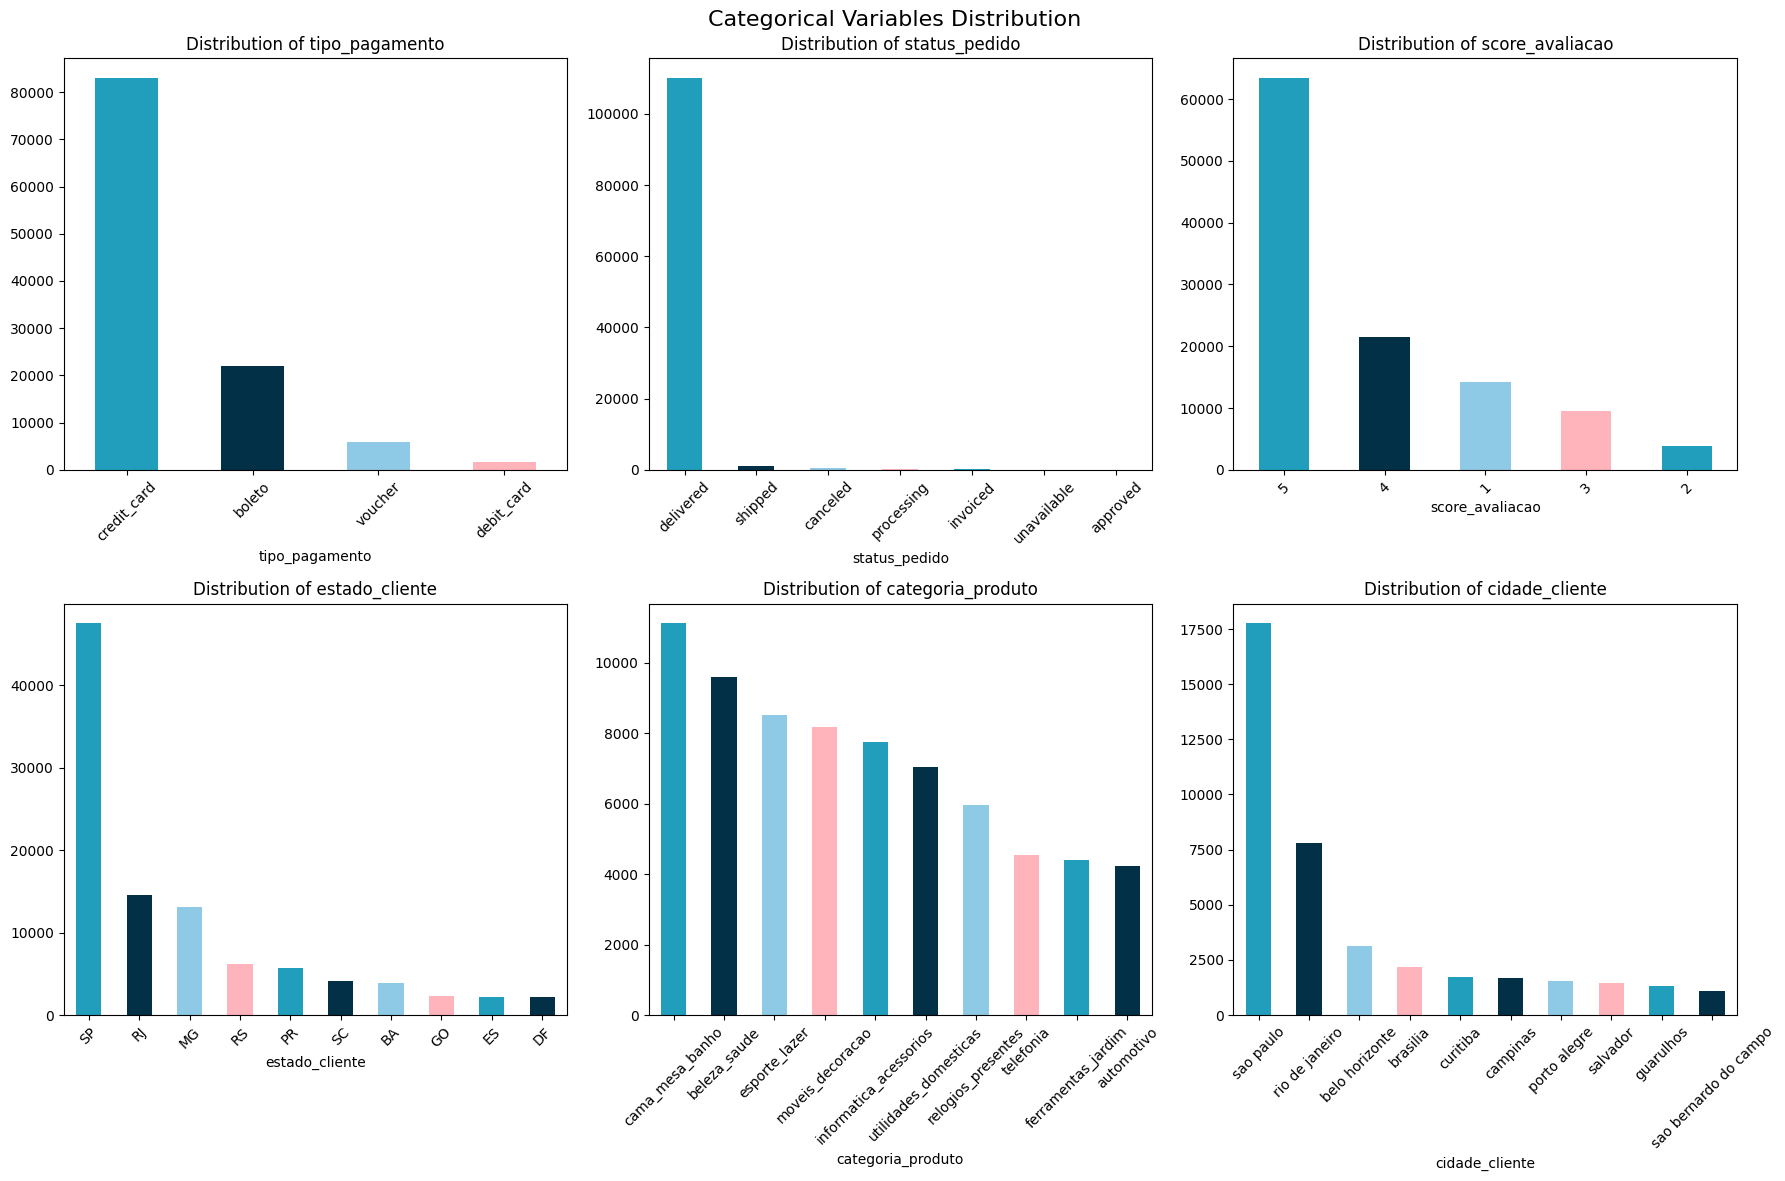

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Categorical Variables Distribution', fontsize=16)

categorical_cols = categorical_variables[:6]

for i, col in enumerate(categorical_cols):
    row = i // 3
    col_idx = i % 3
    ax = axes[row, col_idx]
    
    df[col].value_counts().head(10).plot(kind='bar', ax=ax, color=['#219ebc','#023047','#8ecae6','#ffb3ba'])
    ax.set_title(f'Distribution of {col}')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

In [40]:
df['cep_vendedor'] = df['cep_vendedor'].astype(str)
df['cep_cliente'] = df['cep_cliente'].astype(str)

In [42]:
numerical_variables = df.select_dtypes(include=[np.number]).columns.tolist()

In [43]:
numerical_variables

['prestacoes',
 'valor_pagamento',
 'score_avaliacao',
 'preco',
 'valor_frete',
 'peso_produto',
 'comprimento_produto',
 'altura_produto',
 'largura_produto']

In [44]:
df[numerical_variables].describe()

,prestacoes,valor_pagamento,score_avaliacao,preco,valor_frete,peso_produto,comprimento_produto,altura_produto,largura_produto
count,"112,492.00","112,492.00","112,492.00","112,492.00","112,492.00","112,474.00","112,474.00","112,474.00","112,474.00"
mean,2.92,172.13,4.03,121.25,20.06,"2,115.40",30.24,16.65,23.07
std,2.76,267.55,1.39,184.61,15.92,"3,787.44",16.18,13.49,11.76
min,0.00,0.00,1.00,0.85,0.00,0.00,7.00,2.00,6.00
25%,1.00,60.70,4.00,39.90,13.08,300.00,18.00,8.00,15.00
50%,2.00,108.10,5.00,74.99,16.31,700.00,25.00,13.00,20.00
75%,4.00,188.89,5.00,134.90,21.19,"1,800.00",38.00,20.00,30.00
max,24.00,"13,664.08",5.00,"6,735.00",409.68,"40,425.00",105.00,105.00,118.00


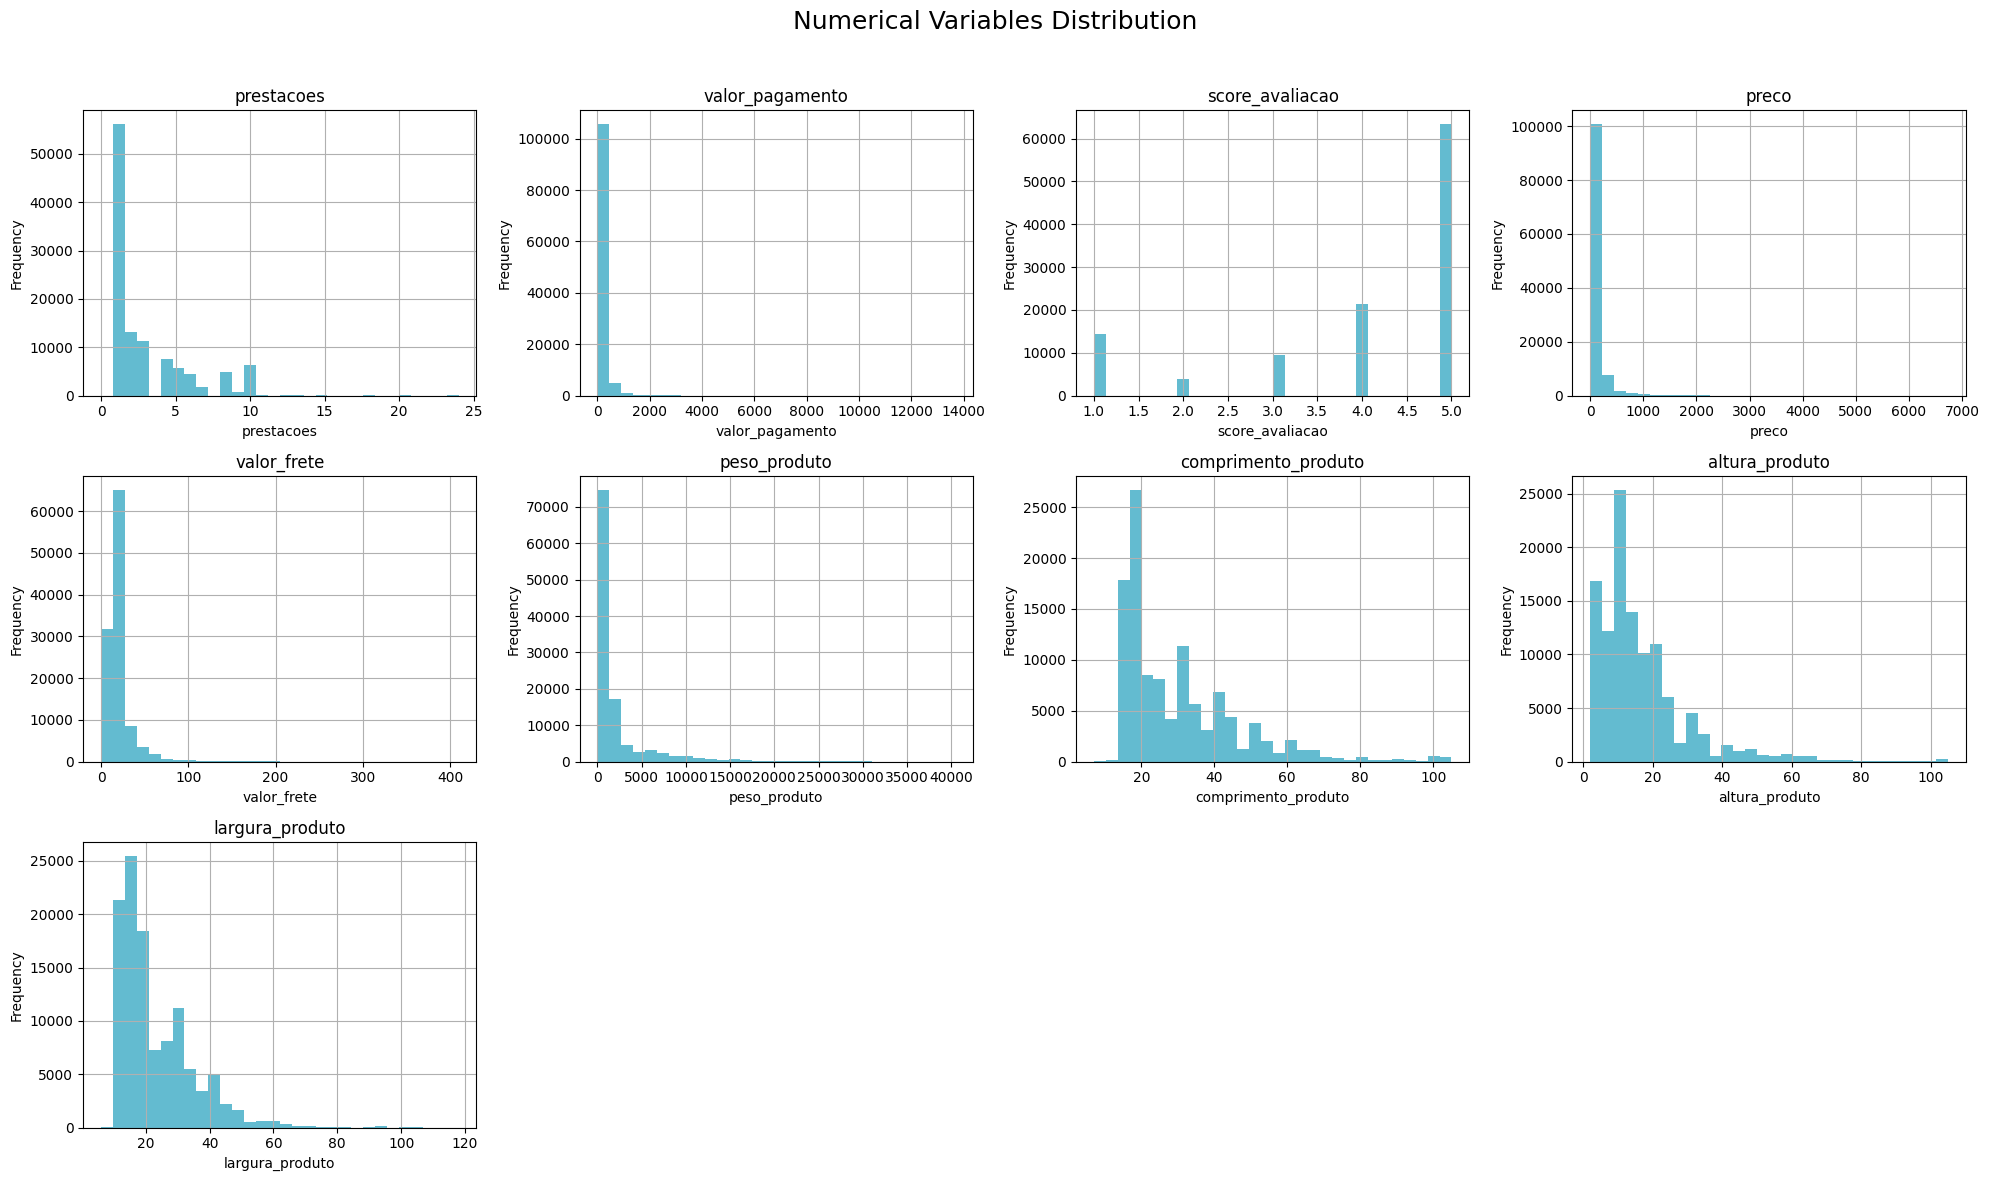

In [45]:
fig, axes = plt.subplots(3, 4, figsize=(20, 12))
fig.suptitle('Numerical Variables Distribution', fontsize=18)

numerical_cols = numerical_variables

for i, col in enumerate(numerical_cols):
    row = i // 4
    col_idx = i % 4
    ax = axes[row, col_idx]
    df[col].hist(bins=30, ax=ax, color='#219ebc', alpha=0.7)
    ax.set_title(f'{col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

if len(numerical_cols) < 12:
    for j in range(len(numerical_cols), 12):
        row = j // 4
        col_idx = j % 4
        axes[row, col_idx].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])